In [1]:
import sys
import os
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import Partition
from statmospheres import Kappa_Hbf_2e
from statmospheres import NIST_Phi
from statmospheres import A_sol
from statmospheres import NIST_Kappa_Total
from statmospheres import NIST_Solve_Pe
from statmospheres import Continuous_Opacity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../lib/plt_format.mplstyle')
from astropy import units as u
from astropy import constants as const

### Equation (9.8) Gray
$P_e = P_g \frac{\sum A_j \frac{\Phi_j(T)/P_e}{1 + \Phi_j(T)/P_e}}{\sum A_j \Big[ 1 + \frac{\Phi_j/P_e}{1 + \Phi_j(T)/P_e} \Big]}$

In [2]:
os.chdir('/storage/home/nxt5197/work/530_stellar_atmospheres/lib')

In [3]:
Partition_table=pd.read_csv('RepairedPartitionFunctions.txt',delimiter=r"\s+", header=None)
PTable=Partition_table.rename(columns={0: 'Element', 1: 0.2,2: 0.4,3: 0.6,4: 0.8,5: 1.0,6: 1.2,7: 1.4,8: 1.6,9: 1.8,10: 2.0,11: 'log g0'})
PTable


,Element,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,log g0
0,H,0.368,0.303,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301
1,He,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,He+,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301,0.301
3,Li,-,0.987,0.488,0.359,0.320,0.308,0.304,0.302,0.302,0.302,0.301
4,Be,-,0.328,0.087,0.025,0.007,0.002,0.001,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Pa+,2.985,2.413,2.169,1.990,1.846,1.723,1.615,1.515,1.419,1.323,1.519
243,Pa++,-,2.106,1.845,1.652,1.469,1.281,1.088,0.895,0.708,0.532,-
244,U,3.221,2.696,2.298,2.032,1.849,1.719,1.623,1.552,1.498,1.455,1.929
245,U+,2.694,2.031,1.719,1.553,1.455,1.392,1.349,1.317,1.292,1.270,1.716


In [4]:
T = 5776*u.K
element = 'Li'

Partition(PTable,element,T)

2.2123184714236346

In [5]:
NistIonizTable = pd.read_csv('nist_ioniz.txt',delimiter='\t',header=None)
NistIonizTable=NistIonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy'})
NistIonizTable['Element'] = NistIonizTable['Element'].str.strip()
# IonizTable = pd.read_fwf('ioniz.txt',header=None)
# IonizTable=IonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy_1',4: 'Ionization_Energy_2',5: 'Ionization_Energy_3'})
NistIonizTable[NistIonizTable['Element']=='H']

,Atomic_Number,Element,Atomic_Weight,Ionization_Energy
0,1,H,1.008,13.598434


In [6]:
df=NistIonizTable
element='H'
row = df[df.Element==element]
X = row['Ionization_Energy'].item()*u.eV
X

<Quantity 13.59843401 eV>

In [7]:
element='Ba'
T = 7715*u.K
NIST_Phi(NistIonizTable,PTable,element,T)

<Quantity 833555.13949913>

In [8]:
ATable = pd.read_csv('SolarAbundance.txt',delimiter='\t',header=0)
df=ATable
element='Li'
df[df.element==element]

def Aj(j):
    return A_sol(ATable,j).A.item()

Aj('Li')

1.26e-11

In [9]:
# element='Eu'
# theta = 5040*u.K/T
# row = df[df.Element==element]
# thetas = list(df)[1:-1]
# U_strs = [val for val in list(row.reset_index(drop=True).iloc[0][1:-1])]
# nulls = []
# for i,U in enumerate(U_strs):
#     if U == '-':
#         nulls.append(i)
# for i in reversed(nulls):
#     del thetas[i]
#     del U_strs[i]
# Us = [float(u) for u in U_strs]
# U_r = np.interp(theta,thetas,Us)
# U_r

In [10]:
# list(PTable.Element[1:])

In [11]:
T = 5733*u.K
elements=list(ATable[ATable.A>0].element)
for element in elements:
    if element not in list(PTable.Element):
        elements.remove(element)
    if element not in list(NistIonizTable.Element):
        elements.remove(element)
    if element!= 'H' and element+'+' not in list(PTable.Element[1:]):
        elements.remove(element)
# elements.insert(0, 'H')
print(elements)
# Pg = 10**4.95
# Pef = NIST_Solve_Pe(Pg,elements,ATable,NistIonizTable,PTable,T)
# print(np.log10(Pef))

['H', 'He', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'W', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Th', 'U']


In [12]:
# Ts = [4310,4325,4345,4370,4405,4445,4488,4524,4561,4608,4660,4720,4800,4878,4995,5132,5294,5490,5733,6043,6429,6904,7467,7962,8358,8630,8811]
# Pgs = [2.87,3.03,3.17,3.29,3.41,3.52,3.64,3.75,3.86,3.97,4.08,4.19,4.30,4.41,4.52,4.63,4.74,4.85,4.95,5.03,5.10,5.15,5.18,5.21,5.23,5.26,5.29]
# Pes = [-1.16,-1.02,-0.89,-0.78,-0.66,-0.55,-0.44,-0.33,-0.23,-0.12,-0.01,0.10,0.22,0.34,0.47,0.61,0.76,0.93,1.15,1.43,1.78,2.18,2.59,2.92,3.16,3.32,3.42]
# data = {'Temp': Ts, 'log_Pg': Pgs, 'log_Pe': Pes}
# Table_9o2 = pd.DataFrame(data)
# # Table_9o2

In [13]:
# talbelen=len(Ts)
# calc_Pe = [np.log10(NIST_Solve_Pe(10**Table_9o2.log_Pg.iloc[i],elements,ATable,NistIonizTable,PTable,Table_9o2.Temp.iloc[i]*u.K)) for i in range(talbelen)]

In [14]:
# Table_9o2['calc_Pe'] = [round(x.value,2) for x in calc_Pe]
# Table_9o2['Pe_diff'] = [Table_9o2.calc_Pe.iloc[i] - Table_9o2.log_Pe.iloc[i] for i in range(talbelen)]
# Table_9o2

In [15]:
SumA = 0
SumAmu = 0
for i in range(30):
    SumA += ATable.A.iloc[i].item()
    SumAmu += ATable.weight.iloc[i].item()*ATable.A.iloc[i].item()
print(f'Sum of Abundances: {SumA}\nSum of Abundances times weights: {SumAmu}')

Sum of Abundances: 1.0861752053727
Sum of Abundances times weights: 1.367107621952563


In [16]:
SumA = 0
SumAmu = 0
for i in range(2,len(ATable)):
    if ATable.A.iloc[i].item() > 0:
        SumA += ATable.A.iloc[i].item()
        SumAmu += ATable.weight.iloc[i].item()*ATable.A.iloc[i].item()
print(f'Sum of Abundances: {SumA}\nSum of Abundances times weights: {SumAmu}')

Sum of Abundances: 0.0010752126721989992
Sum of Abundances times weights: 0.018453079261262224


In [17]:
ValTable = pd.read_csv('VALIIIC.txt', delim_whitespace=True, escapechar='#',skiprows=[0,1,2,3,5])
ValTable = ValTable.replace('d','e', regex=True)
ValTable[0:5]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543,5.257e-06,0.,447000,11.28,1.005e+09,1.205e+09,1.440e-01,0.9896,2.349e-15
1,2298,5.365e-06,3.712e-08,141000,9.87,3.205e+09,3.839e+09,1.470e-01,0.9752,7.494e-15
2,2290,5.373e-06,3.969e-08,89100,9.82,5.041e+09,5.961e+09,1.472e-01,0.9614,1.179e-14
3,2280,5.389e-06,4.491e-08,50000,9.76,9.038e+09,9.993e+09,1.477e-01,0.9318,2.113e-14
4,2274,5.404e-06,4.952e-08,37000,9.73,1.201e+10,1.318e+10,1.481e-01,0.9102,2.808e-14


In [18]:
pd.set_option('display.float_format', '{:.4g}'.format)
ValTable = ValTable.apply(pd.to_numeric)
ValTable[0:5]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho
0,2543,5.257e-06,0,447000,11.28,1.005e+09,1.205e+09,0.144,0.9896,2.349e-15
1,2298,5.365e-06,3.712e-08,141000,9.87,3.205e+09,3.839e+09,0.147,0.9752,7.494e-15
2,2290,5.373e-06,3.969e-08,89100,9.82,5.041e+09,5.961e+09,0.1472,0.9614,1.179e-14
3,2280,5.389e-06,4.491e-08,50000,9.76,9.038e+09,9.993e+09,0.1477,0.9318,2.113e-14
4,2274,5.404e-06,4.952e-08,37000,9.73,1.201e+10,1.318e+10,0.1481,0.9102,2.808e-14


In [19]:
Valen = len(ValTable)
P_es = [0 for i in range(Valen)]
P_e_ideals = [0 for i in range(Valen)]
log_n_ps = [0 for i in range(Valen)]
for i in range(Valen):
    row = ValTable.iloc[i]
    Pgas = row['Ptotal']*row['Pgas/Ptotal']
    Temp = row['T']*u.K
    n_H = row['n_H']
    Phi_H = NIST_Phi(NistIonizTable, PTable, 'H', Temp)
    P_e = NIST_Solve_Pe(Pgas,elements,ATable,NistIonizTable,PTable,Temp)
    P_es[i] = P_e
    k = const.k_B.cgs
    n_e = row['n_e']
    P_e_ideal = n_e*k*Temp/u.erg
    P_e_ideals[i] = P_e_ideal
    n_p = n_H*Phi_H/P_e_ideal
    log_n_ps[i] = np.log10(n_p)
ValTable['P_e'] = P_es
ValTable['log(n_p)'] = log_n_ps
ValTable['log(n_e)'] = [np.log10(i) for i in ValTable['n_e']]

It took 1 iterations to calculate P_e
It took 2 iterations to calculate P_e
It took 2 iterations to calculate P_e
It took 2 iterations to calculate P_e
It took 2 iterations to calculate P_e
It took 2 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 4 iterations to calculate P_e
It took 7 iterations to calculate P_e
It took 9 iterations to calculate P_e
It took 6 iterations to calculate P_e
It took 7 iterations to calculate P_e
It took 8 iterations to calculate P_e
It took 8 iterations to calculate P_e
It took 10 iterations to calculate P_e
It took 12 iterations to calculate P_e
It took 15 iterations to calculate P_e
It took 20 iterations to calculate P_e
It took 

In [20]:
ValTable[-17:-3]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho,P_e,log(n_p),log(n_e)
35,855,0.002632,1.553e-05,5650,1.53,8.135e+13,1.064e+11,72.1,0.9691,1.902e-10,0.20211196714516647,11.763920974698722,11.03
36,755,0.005577,2.537e-05,5280,1.23,1.864e+14,8.838e+10,152.8,0.9784,4.358e-10,0.11024123657129338,11.310436292482233,10.95
37,705,0.008333,3.288e-05,5030,1.09,2.935e+14,7.664e+10,228.3,0.9821,6.864e-10,0.06966117098259407,10.89275278810904,10.88
38,655,0.01276,4.452e-05,4730,0.96,4.794e+14,8.085e+10,349.5,0.9852,1.121e-09,0.04779068552870806,10.178363287337593,10.91
39,605,0.02013,7.022e-05,4420,0.83,8.119e+14,1.112e+11,551.6,0.9881,1.899e-09,0.053567935723901054,9.208341375318009,11.05
40,555,0.0327,0.0001456,4230,0.7,1.382e+15,1.733e+11,895.8,0.9912,3.232e-09,0.07323290255055295,8.521547443735068,11.24
41,515,0.04878,0.0003014,4170,0.6,2.096e+15,2.495e+11,1336,0.9934,4.902e-09,0.0968749481659011,8.301724317280245,11.4
42,450,0.09378,0.001017,4220,0.53,3.989e+15,4.516e+11,2569,0.9949,9.327e-09,0.17408759725272643,8.526011904030781,11.65
43,350,0.2481,0.005626,4465,0.52,9.979e+15,1.11e+12,6798,0.9954,2.334e-08,0.49533846360007877,9.461580990957131,12.05
44,250,0.6172,0.0267,4780,0.63,2.315e+16,2.674e+12,1.691e+04,0.9936,5.413e-08,1.3825793504328856,10.501150523815317,12.43


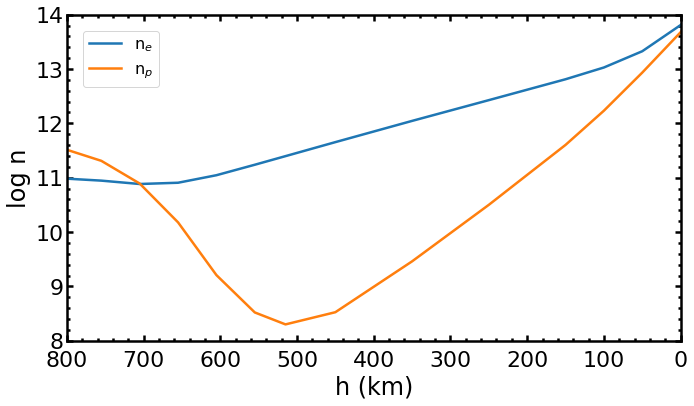

In [21]:
h=ValTable[' h']
ne=ValTable['log(n_e)']
np=ValTable['log(n_p)']
plt.plot(h,ne,label=r'n$_e$')
plt.plot(h,np,label=r'n$_p$')
plt.xlim(800,0)
plt.ylim(8,14)
plt.xlabel('h (km)')
plt.ylabel('log n')
plt.legend()
plt.show()

In [22]:
Temp = 5680 *u.K
import numpy as np
Phi_H = NIST_Phi(NistIonizTable, PTable, 'H', Temp)
n_H = np.interp(800,ValTable[' h'],ValTable['n_H'])
n_e = np.interp(800,ValTable[' h'],ValTable['n_e'])
k = const.k_B.cgs.value
n_p=n_H*Phi_H/(n_e*k*Temp/u.K)
np.log10(n_p)

<Quantity 11.00252945>

In [23]:
Valen = len(ValTable)
IFs_Fe = [0 for i in range(Valen)]
IFs_Mg = [0 for i in range(Valen)]
IFs_Si = [0 for i in range(Valen)]
IFs_H = [0 for i in range(Valen)]
for i in range(Valen):
    if ValTable[' h'][i] < 1000:
        row = ValTable.iloc[i]
        Pgas = row['Ptotal']*row['Pgas/Ptotal']
        Temp = row['T']*u.K
        n_H = row['n_H']
        n_e = row['n_e']
        P_e = row['P_e']
        Phi_Fe = NIST_Phi(NistIonizTable, PTable, 'Fe', Temp)
        Phi_FeI = NIST_Phi(NistIonizTable, PTable, 'Fe+', Temp)
        N1s_Fe = (Phi_Fe/P_e)/(1+Phi_Fe/P_e+Phi_Fe/P_e*Phi_FeI/P_e)*Aj('Fe')*n_H
        N2s_Fe = (2*Phi_Fe/P_e*Phi_FeI/P_e)/(1+Phi_Fe/P_e+Phi_Fe/P_e*Phi_FeI/P_e)*Aj('Fe')*n_H
        NIFe = N1s_Fe + N2s_Fe
        IFs_Fe[i] = NIFe/n_e
        Phi_Mg = NIST_Phi(NistIonizTable, PTable, 'Mg', Temp)
        Phi_MgI = NIST_Phi(NistIonizTable, PTable, 'Mg+', Temp)
        N1s_Mg = (Phi_Mg/P_e)/(1+Phi_Mg/P_e+Phi_Mg/P_e*Phi_MgI/P_e)*Aj('Mg')*n_H
        N2s_Mg = (2*Phi_Mg/P_e*Phi_MgI/P_e)/(1+Phi_Mg/P_e+Phi_Mg/P_e*Phi_MgI/P_e)*Aj('Mg')*n_H
        NIMg = N1s_Mg + N2s_Mg
        IFs_Mg[i] = NIMg/n_e
        Phi_Si = NIST_Phi(NistIonizTable, PTable, 'Si', Temp)
        Phi_SiI = NIST_Phi(NistIonizTable, PTable, 'Si+', Temp)
        N1s_Si = (Phi_Si/P_e)/(1+Phi_Si/P_e+Phi_Si/P_e*Phi_SiI/P_e)*Aj('Si')*n_H
        N2s_Si = (2*Phi_Si/P_e*Phi_SiI/P_e)/(1+Phi_Si/P_e+Phi_Si/P_e*Phi_SiI/P_e)*Aj('Si')*n_H
        NISi = N1s_Si + N2s_Si
        IFs_Si[i] = NISi/n_e
        Phi_H = NIST_Phi(NistIonizTable, PTable, 'H', Temp)
        Phi_Hmin = NIST_Phi(NistIonizTable, PTable, 'H-', Temp)
        N1s_H = (Phi_H/P_e)/(1+Phi_H/P_e+P_e/Phi_Hmin)*Aj('H')*n_H
        N1s_Hmin = (P_e/Phi_Hmin)/(1+Phi_H/P_e+P_e/Phi_Hmin)*Aj('H')*n_H
        NIH = N1s_H-N1s_Hmin
        IFs_H[i] = NIH/n_e

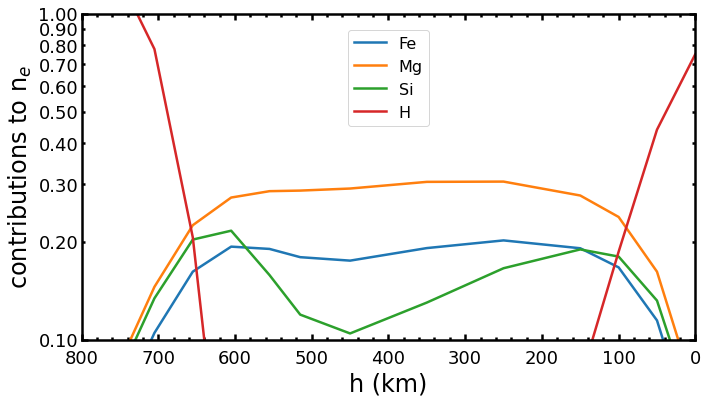

In [24]:
from matplotlib import ticker
import matplotlib.ticker as mticker
fig, ax = plt.subplots()
plt.plot(h,IFs_Fe,label='Fe')
plt.plot(h,IFs_Mg,label='Mg')
plt.plot(h,IFs_Si,label='Si')
plt.plot(h,IFs_H,label='H')
plt.xlim(800,0)
plt.yscale('log')
plt.ylim(0.1,1)
plt.ylabel(r'contributions to n$_e$')
plt.xlabel('h (km)')
plt.legend()
mticker = ticker.ScalarFormatter(useOffset=False)
mticker.set_powerlimits((-6, 6))
ax.yaxis.set_major_formatter(mticker)
ax.yaxis.set_minor_formatter(mticker)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.tick_params(axis='both', which='minor', labelsize=18)
plt.show()

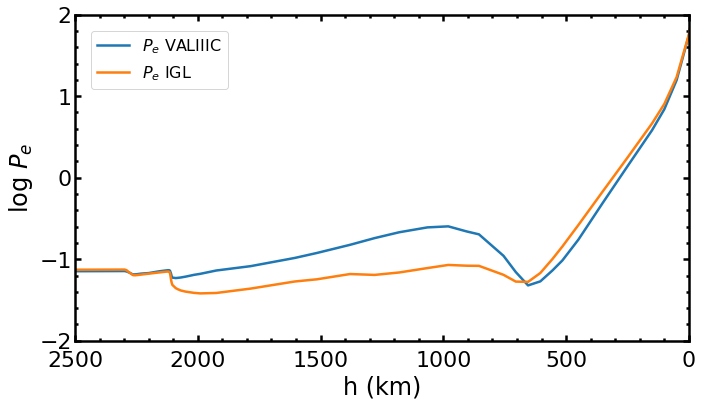

In [25]:
plt.plot(h,[np.log10(y) for y in P_es],label=r'$P_e$ VALIIIC')
plt.plot(h,[np.log10(y) for y in P_e_ideals],label=r'$P_e$ IGL')
plt.legend()
plt.xlim(2500,0)
plt.ylim(-2,2)
plt.ylabel(r'log $P_e$')
plt.xlabel('h (km)')
plt.show()

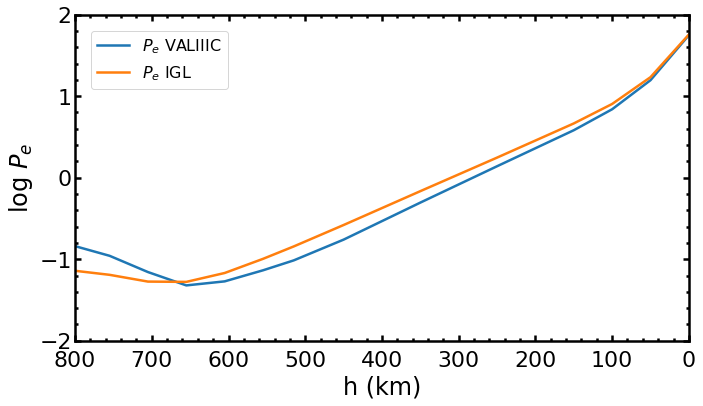

In [26]:
plt.plot(h,[np.log10(y) for y in P_es],label=r'$P_e$ VALIIIC')
plt.plot(h,[np.log10(y) for y in P_e_ideals],label=r'$P_e$ IGL')
plt.legend()
plt.xlim(800,0)
plt.ylim(-2,2)
plt.ylabel(r'log $P_e$')
plt.xlabel('h (km)')
plt.show()

In [27]:
Kappas = [0 for i in range(Valen)]
lam=np.linspace(3000,20000,1000)*u.Angstrom
for i, P_e in enumerate(P_es):
    Temp = ValTable['T'][i]*u.K
    n_H = ValTable['n_H'][i]
    m_p = const.m_p.cgs
    Kappas[i] = NIST_Kappa_Total(NistIonizTable,PTable,P_e,Temp,lam)*n_H/m_p

In [28]:
Kappas

[<Quantity [  2195.68790004,   2226.41032251,   2257.39102743,
              2288.63079436,   2320.13040141,   2351.89062526,
              2383.91224116,   2416.19602292,   2448.74274297,
              2481.55317233,   2514.62808062,   2547.96823609,
              2581.57440564,   2615.44735478,   2649.5878477 ,
              2683.99664722,   2718.67451485,   2753.62221078,
              2788.84049387,   2824.33012171,   2860.09185055,
              2896.12643539,   2932.43462995,   2969.01718666,
              3005.87485672,   3043.00839005,   3080.41853535,
              3118.10604007,   3156.07165045,   3194.31611149,
              3232.840167  ,   3271.64455956,   3310.73003059,
              3350.09732031,   3389.74716773,   3429.68031073,
              3469.89748601,   3510.39942911,   3551.18687441,
              3592.26055516,   3633.62120347,   3675.26955033,
              3717.20632559,   3759.432258  ,   3715.65861742,
              3757.74511013,   3800.12054659,   3842.78

In [29]:
def mu(j):
    if j == 'H-':
        j = 'H'
    return A_sol(ATable, j).weight.item()
sumAjmuj = sum([Aj(j)*mu(j)*m_p for j in elements])/u.g

In [30]:
Pgas = 1.13*10**5
Temp = 6420*u.K
P_e = NIST_Solve_Pe(Pgas,elements,ATable,NistIonizTable,PTable,Temp)
print(f'\nCalculated P_e: {P_e}\t\t\tFrom Table: 57.0\n')
Pgas = 1259
Temp = 11572*u.K
P_e = NIST_Solve_Pe(Pgas,elements,ATable,NistIonizTable,PTable,Temp)
print(f'\nCalculated P_e: {P_e}\t\t\tFrom Table: {10**2.76}\n')

Count exceeded. While loop broken.
Pef: 55.81787262054379
Pei: 55.817664714470055
It took 50 iterations to calculate P_e

Calculated P_e: 55.81787262054379			From Table: 57.0

It took 15 iterations to calculate P_e

Calculated P_e: 573.8651696616273			From Table: 575.4399373371566



In [31]:
Temp = 6420*u.K
P_e = 57.0
P_g = 1.13*10**5
lam = 5000*u.Angstrom
neutralHfrac1=1/(1+NIST_Phi(NistIonizTable,PTable,'H',Temp)/P_e)
theta=5040*u.K/Temp
X_lam = 1.2398*10**4/(lam*(1/u.Angstrom))
Stim1 = (1-10**(-theta*X_lam))
Kcont,KHbfmin,KHffmin,KHbf,KHff,Ke = Continuous_Opacity(Temp,P_e,P_g,lam,elements,ATable,NistIonizTable,PTable)
Temp = 11572*u.K
P_e = 10**2.76
P_g = 1259
lam = (1.5*u.micron).to(u.Angstrom)
theta=5040*u.K/Temp
X_lam = 1.2398*10**4/(lam*(1/u.Angstrom))
Stim2 = (1-10**(-theta*X_lam))
neutralHfrac2=1/(1+NIST_Phi(NistIonizTable,PTable,'H',Temp)/P_e)
Kcont2,KHbfmin2,KHffmin2,KHbf2,KHff2,Ke2 = Continuous_Opacity(Temp,P_e,P_g,lam,elements,ATable,NistIonizTable,PTable)
print('\t\t\t\tLeft Column\t\t\t\tRight Column')
print(f'T(K)\t\t\t\t{6420}\t\t\t\t\t{11572}')
print(f'P_e(Ba)\t\t\t\t{57.0}\t\t\t\t\t{10**2.76}')
print(f'P_g(Ba)\t\t\t\t{1.13*10**5}\t\t\t{1259}')
print(f'lambda\t\t\t\t{5000*u.Angstrom}\t\t\t\t{1.5*u.micron}')
print('\n\t\t\tCalculated\t\tTable\t\tCalculated\t\tTable')
print(f'Stimulated Emission\t{Stim1}\t0.9887\t\t{Stim2}\t0.5634')
print(f'H neutral fraction\t{neutralHfrac1}\t0.9995920\t{neutralHfrac2}\t0.09139')
print(f'Sum A_j mu_j (g)\t{sumAjmuj.value}\t2.2701e-24\n')
print(f'Kappa (continuum): \t{Kcont}\t0.6888\t\t{Kcont2}\t75.16')
print(f'Kappa (Hbf-): \t\t{KHbfmin}\t0.6428\t\t{KHbfmin2}\t0.01072')
print(f'Kappa (Hff-): \t\t{KHffmin}\t0.03751\t\t{KHffmin2}\t0.1531')
print(f'Kappa (Hbf): \t\t{KHbf}\t0.008097\t{KHbf2}\t31.52')
print(f'Kappa (Hff): \t\t{KHff}\t0.0002791\t{KHff2}\t43.21')
print(f'Kappa (e-): \t\t{Ke}\t0.0001606\t{Ke2}\t0.2445')

				Left Column				Right Column
T(K)				6420					11572
P_e(Ba)				57.0					575.4399373371566
P_g(Ba)				112999.99999999999			1259
lambda				5000.0 Angstrom				1.5 micron

			Calculated		Table		Calculated		Table
Stimulated Emission	0.9886916789247833	0.9887		0.5634674908036263	0.5634
H neutral fraction	0.9995924511263068	0.9995920	0.09146331120825535	0.09139
Sum A_j mu_j (g)	2.2866554330392908e-24	2.2701e-24

Kappa (continuum): 	0.6852696660010503	0.6888		76.26358640667385	75.16
Kappa (Hbf-): 		0.6397353166784318	0.6428		0.11665918902318836	0.01072
Kappa (Hff-): 		0.037259567243223185	0.03751		1.663457527658878	0.1531
Kappa (Hbf): 		0.008117815054084352	0.008097	360.0506278261489	31.52
Kappa (Hff): 		0.00027692711300764605	0.0002791	469.07893485216863	43.21
Kappa (e-): 		0.00015936968245672877	0.0001606	0.26583581421731706	0.2445


In [32]:
Taus = ValTable['tau_500']
Temps = ValTable['T']*u.K
P_gs = ValTable['Ptotal']*ValTable['Pgas/Ptotal']
P_es = ValTable['P_e']
lam = (500*u.nm).to(u.Angstrom)
K500 = [0 for i in range(Valen)]
for i in range(Valen):
    K500[i],KHbfmin,KHffmin,KHbf,KHff,Ke = Continuous_Opacity(Temps[i],P_es[i],P_gs[i],lam,elements,ATable,NistIonizTable,PTable)
ValTable['Kappa_500'] = K500

In [33]:
from scipy import interpolate
Kfunc = interpolate.interp1d(Taus,K500)

In [34]:
ValTable[0:5]

,h,m,tau_500,T,V,n_H,n_e,Ptotal,Pgas/Ptotal,rho,P_e,log(n_p),log(n_e),Kappa_500
0,2543,5.257e-06,0,447000,11.28,1.005e+09,1.205e+09,0.144,0.9896,2.349e-15,0.07125119999999989,23.559032545535974,9.081,0.31578443136910556
1,2298,5.365e-06,3.712e-08,141000,9.87,3.205e+09,3.839e+09,0.147,0.9752,7.494e-15,0.07167719999999635,22.475083778030445,9.584,0.3157875968927861
2,2290,5.373e-06,3.969e-08,89100,9.82,5.041e+09,5.961e+09,0.1472,0.9614,1.179e-14,0.07075903999997805,21.898526654695225,9.775,0.3157934401868934
3,2280,5.389e-06,4.491e-08,50000,9.76,9.038e+09,9.993e+09,0.1477,0.9318,2.113e-14,0.06881342999960167,20.949826178952016,10,0.3158192755709498
4,2274,5.404e-06,4.952e-08,37000,9.73,1.201e+10,1.318e+10,0.1481,0.9102,2.808e-14,0.06740030999687809,20.275319827008943,10.12,0.31585775636853336


In [35]:
Kfunc(3.8e-8)

array(0.3157896)

In [47]:
Kappa_19d = [0 for i in range(Valen-1)]
Tau_19 = [0 for i in range(Valen-1)]
hs = [0 for i in range(Valen-1)]
for i in range(Valen-1):
    Temp = (Temps[i]+Temps[i+1])/2
    g = 10**4.4377
    dTau = Taus[i+1]-Taus[i]
    Tau = (Taus[i]+Taus[i+1])/2
    Ptotal = (ValTable['Ptotal'][i]+ValTable['Ptotal'][i+1])/2
    dP = ValTable['Ptotal'][i+1] - ValTable['Ptotal'][i]
    Kappa = g*dTau/dP
    Tau_19[i] = Tau
    Kappa_19d[i] = Kappa
    hs[i] = ValTable[' h'].iloc[i].item()
    print(f'Kappa: {Kappa:.6f}\t\tTau: {Tau:.4E}\t\tKappa func: {Kfunc(Tau):.6f}\t\tDiff: {(Kappa - Kfunc(Tau)):.6f}')

Kappa: 0.338990		Tau: 1.8560E-08		Kappa func: 0.315786		Diff: 0.023204
Kappa: 0.352049		Tau: 3.8405E-08		Kappa func: 0.315791		Diff: 0.036258
Kappa: 0.286023		Tau: 4.2300E-08		Kappa func: 0.315806		Diff: -0.029784
Kappa: 0.315748		Tau: 4.7215E-08		Kappa func: 0.315839		Diff: -0.000090
Kappa: 0.386295		Tau: 5.0930E-08		Kappa func: 0.315874		Diff: 0.070421
Kappa: 0.289721		Tau: 5.4455E-08		Kappa func: 0.315913		Diff: -0.026192
Kappa: 0.319858		Tau: 5.8905E-08		Kappa func: 0.315957		Diff: 0.003901
Kappa: 0.300147		Tau: 6.6170E-08		Kappa func: 0.315990		Diff: -0.015842
Kappa: 0.291319		Tau: 8.7050E-08		Kappa func: 0.316007		Diff: -0.024688
Kappa: 0.301365		Tau: 1.2280E-07		Kappa func: 0.316018		Diff: -0.014653
Kappa: 0.295993		Tau: 1.7015E-07		Kappa func: 0.316035		Diff: -0.020042
Kappa: 0.293537		Tau: 2.2020E-07		Kappa func: 0.316060		Diff: -0.022523
Kappa: 0.284505		Tau: 2.4945E-07		Kappa func: 0.316082		Diff: -0.031576
Kappa: 0.305279		Tau: 2.6010E-07		Kappa func: 0.316123		Diff: -0.010

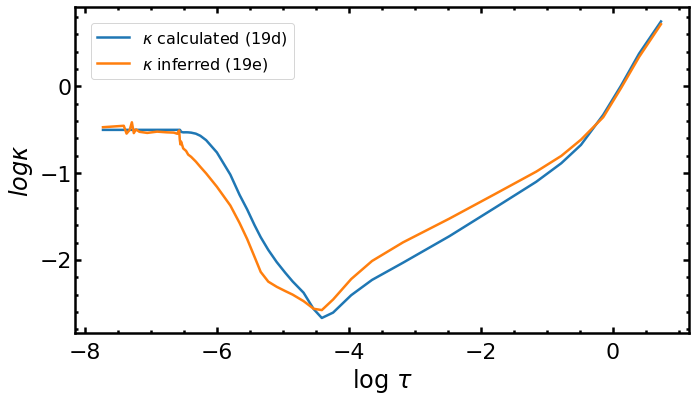

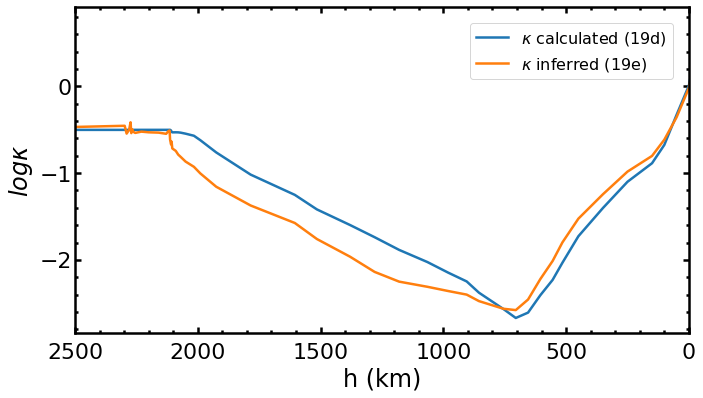

In [50]:
x = Tau_19
plt.plot(np.log10(x),np.log10(Kfunc(x)),label=r'$\kappa$ calculated (19d)')
plt.plot(np.log10(x),np.log10(Kappa_19d),label=r'$\kappa$ inferred (19e)')
plt.xlabel(r'log $\tau$')
plt.ylabel(r'$log \kappa$')
plt.legend()
plt.show()
x = hs
plt.plot(x,np.log10(Kfunc(Tau_19)),label=r'$\kappa$ calculated (19d)')
plt.plot(x,np.log10(Kappa_19d),label=r'$\kappa$ inferred (19e)')
plt.xlabel('h (km)')
plt.ylabel(r'$log \kappa$')
plt.xlim(2500,0)
plt.legend()
plt.show()